In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv("../data_cleanup/clean_data.csv")

In [17]:
df.head()

,model_name,model_version,created_at,downloads,likes,library_name,nb_base_model,nb_dataset,framework_torch,framework_jax,...,ONEHOT_autotrain_compatible,ONEHOT_safetensors,ONEHOT_tensorboard,ONEHOT_has_space,NB_en,NB_fr,NB_zh,NB_ar,NB_de,NB_es
0,albert,albert-base-v1,2022-03-02,74335,4,transformers,0,2,1,0,...,1,1,0,0,1,0,0,0,0,0
1,albert,albert-base-v2,2022-03-02,2855580,75,transformers,0,2,1,1,...,1,1,0,0,1,0,0,0,0,0
2,albert,albert-large-v1,2022-03-02,1491,0,transformers,0,2,1,0,...,1,0,0,0,1,0,0,0,0,0
3,albert,albert-large-v2,2022-03-02,6875,12,transformers,0,2,1,0,...,1,1,0,0,1,0,0,0,0,0
4,albert,albert-xlarge-v1,2022-03-02,1449,1,transformers,0,2,1,0,...,1,1,0,0,1,0,0,0,0,0


# Q1 Les caractéristiques dominantes des modèles Transformer sur Hugging Face

In [18]:
model_name = df['model_name']
model_name.value_counts()

model_name
tkcho          3643
TheBloke       1317
timm           1247
NLP             792
facebook        453
               ... 
chenyanjin        1
CynthiaCR         1
ItbearZhang       1
Sula1723          1
tinywell          1
Name: count, Length: 13277, dtype: int64

Text(0.5, 1.0, 'Les modèles les plus présents')

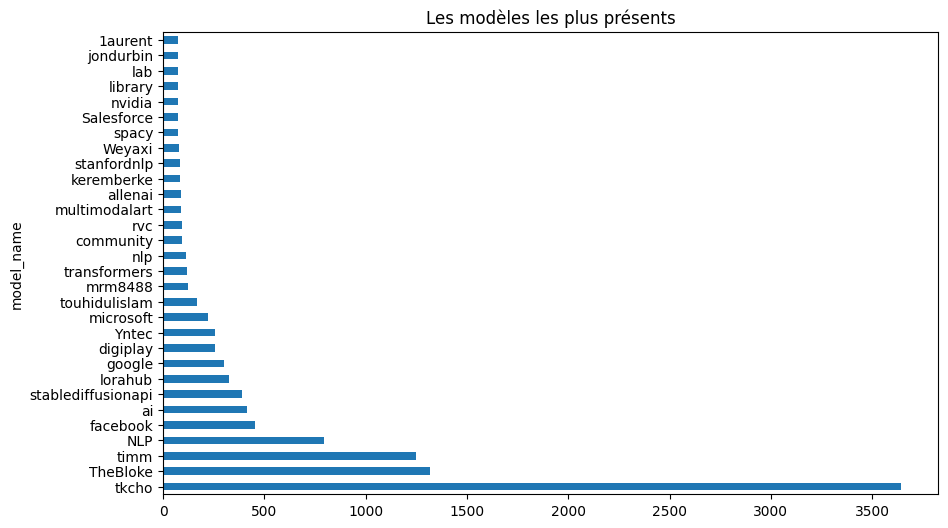

In [19]:
plt.figure(figsize=(10, 6))
model_name.value_counts().head(30).plot.barh()
plt.title("Les modèles les plus présents")

In [20]:
abt_model = df[['model_name', 'downloads']]
abt_model = abt_model.sort_values(by='downloads', ascending=False).head(20)
abt_model

,model_name,downloads
4976,pysentimiento,66990391
3943,jonatasgrosman,60679804
22700,Supabase,47702018
6091,cardiffnlp,47205553
4761,openai,44193559
16,NaN,36896219
40,NaN,21501386
37,NaN,19783506
43,NaN,12497235
3953,jonatasgrosman,12332564


Text(0.5, 1.0, 'Les modèles les plus téléchargés')

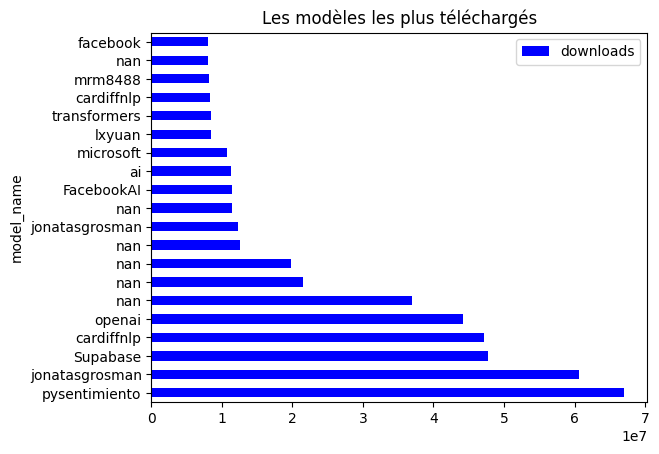

In [21]:
filtered_abt_model = abt_model[abt_model['model_name'] != 'nan']
filtered_abt_model.plot.barh('model_name', 'downloads', color='blue')
plt.title("Les modèles les plus téléchargés")

In [22]:
df['model_name'] = df['model_name'].astype(str)

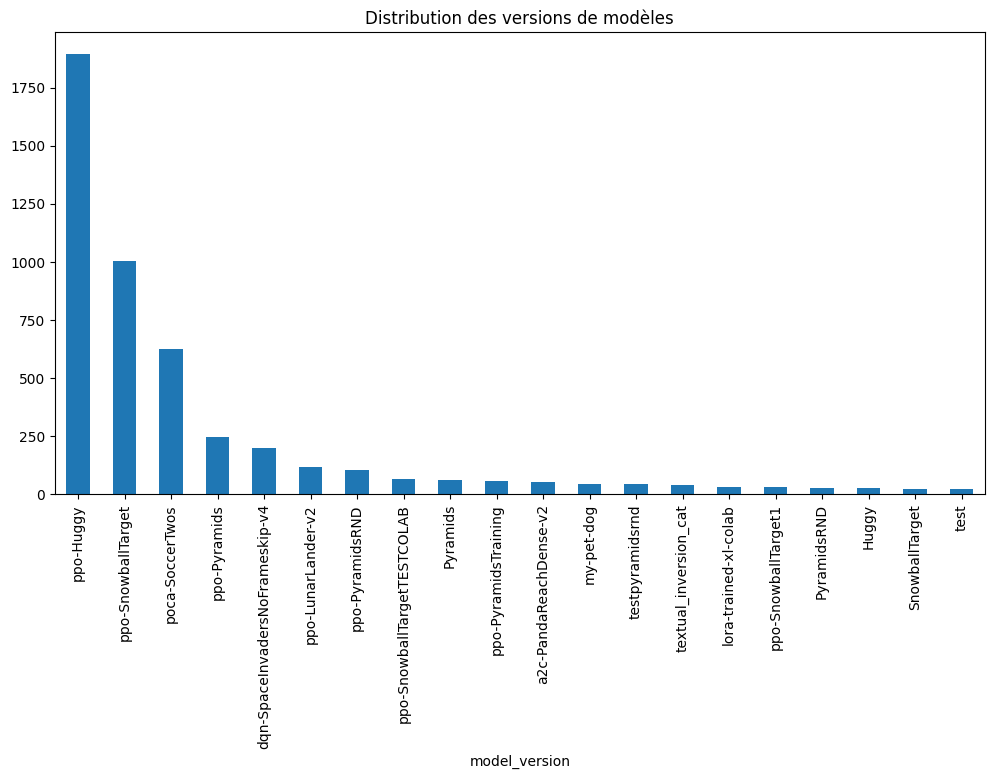

In [23]:
# La distribution des versions de modèles
plt.figure(figsize=(12, 6))
df['model_version'].value_counts().head(20).plot(kind='bar')
plt.title('Distribution des versions de modèles')
plt.show()

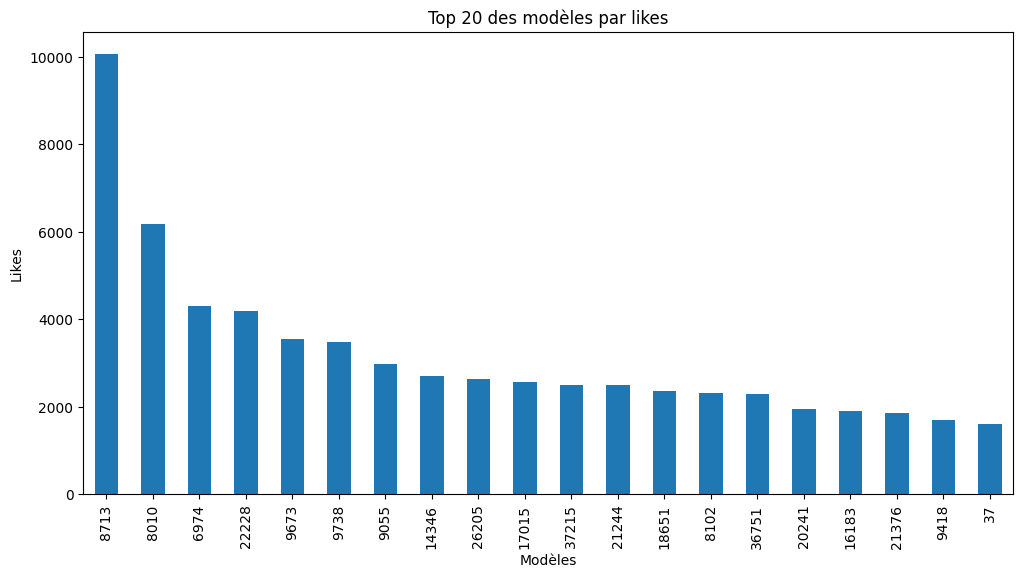

In [24]:
# Analyse de la distribution des likes
top_20 = df.nlargest(20, 'likes')
top_20.set_index('model_name')
ax = top_20['likes'].plot(kind='bar', figsize=(12, 6))
ax.set_title('Top 20 des modèles par likes')
ax.set_xlabel('Modèles')
ax.set_ylabel('Likes')
plt.show()

In [25]:
df['tasks']

0                                                fill-mask
1                                                fill-mask
2                                                fill-mask
3                                                fill-mask
4                                                fill-mask
                               ...                        
44706      vit,image-classification,generated_from_trainer
44707            text-generation,text-generation-inference
44708            text-generation,text-generation-inference
44709    ml-agents,huggy,deep-reinforcement-learning,re...
44710                                                  NaN
Name: tasks, Length: 44711, dtype: object

In [26]:

# Analyse des frameworks utilisés
framework_counts = df[['framework_torch', 'framework_jax', 'framework_onnx', 'framework_tensorflow', 'framework_keras']].sum()
framework_counts

framework_torch         23244
framework_jax            1655
framework_onnx           5779
framework_tensorflow     2434
framework_keras           322
dtype: int64

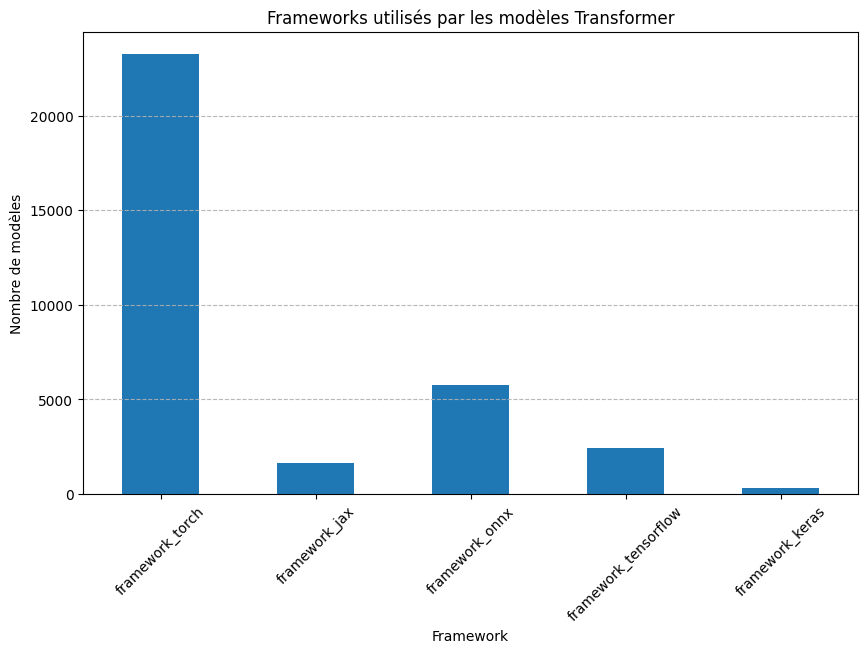

In [27]:
plt.figure(figsize=(10, 6))
framework_counts.plot(kind='bar')
plt.title('Frameworks utilisés par les modèles Transformer')
plt.xlabel('Framework')
plt.ylabel('Nombre de modèles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

# Q3 Tendances émergentes en termes de langues prises en charge par les modèles

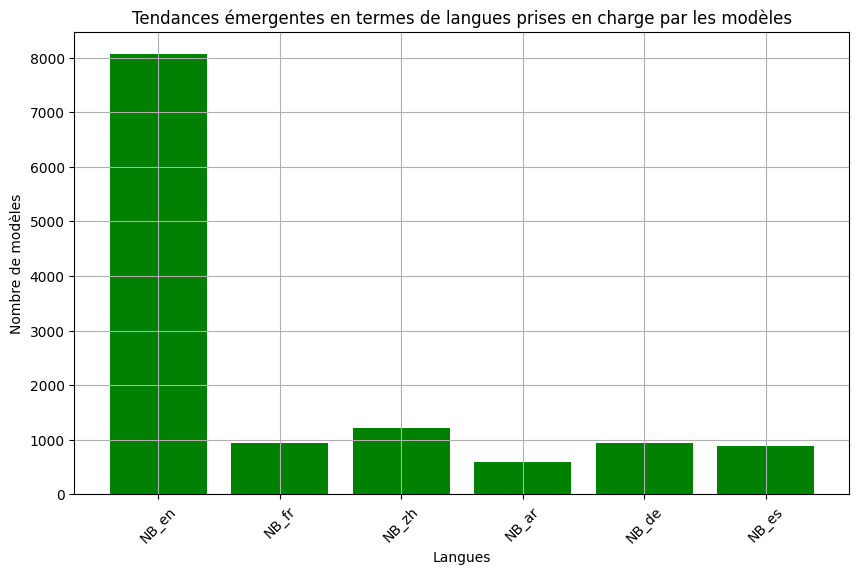

In [28]:
languages = ['NB_en', 'NB_fr', 'NB_zh', 'NB_ar', 'NB_de', 'NB_es']
language_counts = df[languages].sum()

data = np.repeat(languages, language_counts)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=np.arange(len(languages)+1)-0.5, rwidth=0.8, color='green')
plt.title('Tendances émergentes en termes de langues prises en charge par les modèles')
plt.xlabel('Langues')
plt.ylabel('Nombre de modèles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()